# 3/8/21 - This notebook attempts to make use of the weight maps for 2730.

In [1]:
### libraries
%matplotlib inline
import matplotlib.pyplot as plt
#from autoconf import conf
#import autolens as al
#import autolens.plot as aplt
#import autofit as af
#import pandas as pd
import numpy as np
import astropy.io.fits as fits
#from astropy.visualization import astropy_mpl_style
#plt.style.use(astropy_mpl_style)
from astropy.stats import sigma_clip as clip
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.nddata import Cutout2D
from astropy.wcs import WCS
import fitsio
from fitsio import FITS,FITSHDR



In [18]:
hdul = fits.open('/home/shawn/Downloads/129_-1pt5_r_image.fits')

data = hdul[0].data

print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


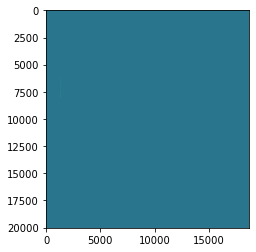

In [8]:
plt.imshow(data)

In [10]:
hdul.close()

In [5]:
# try to open weight file
hdul = fits.open('/home/shawn/Downloads/Cal-JDEJONG-OMEGACAM-------OCAM_r_SDSS---Coadd---Wei-57878.9661791-55afda6652732cdda03ef77e75125ef075547d50.fits')
header = hdul[0].header
image = hdul[0].data
hdul.close()

print(image)
print('median pixel: ', np.median(image))
print(header)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
median pixel:  1.5508987e+23
SIMPLE  =                    T / This is a FITS file                            BITPIX  =                  -32 /                                                NAXIS   =                    2 /                                                NAXIS1  =                18687 / Number of pixels along this axis               NAXIS2  =                20024 / Number of pixels along this axis               EXTEND  =                    T / This file may contain FITS extensions          EQUINOX =            2000.0000 / Mean equinox                                   RADECSYS= 'ICRS    '           / Astrometric system                             CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              CUNIT1  = 'deg     '           / Axis unit                                      CRVAL1  =      

In [18]:
# wcs is world coordinate system
# attached real-world coordinates to pixel locations
wcs = WCS(header) # let wcs pull info from header
print(wcs)

coord=SkyCoord(ra=129.23265, dec=-1.57512, unit='deg', frame='icrs') # international celestial reference frame
position = wcs.world_to_pixel(coord)
print(coord)
#print(wcs.wcs.crval)
print(position)
size = u.Quantity(101, u.pixel)

cutout = Cutout2D(data=image, position=position, size=size, wcs=wcs, mode='trim')
cutout_image = cutout.data
#plt.imshow(image, origin='lower', cmap='gray')   
#plt.scatter(cutout.position_cutout[0], cutout.position_cutout[1], color='green')
print(cutout_image.shape)

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 129.0  -1.489010989  
CRPIX : 9374.0  9925.0  
CD1_1 CD1_2  : -5.555555638e-05  0.0  
CD2_1 CD2_2  : 0.0  5.555555638e-05  
NAXIS : 18687  20024
<SkyCoord (ICRS): (ra, dec) in deg
    (129.23265, -1.57512)>
(array(5186.85469413), array(8373.8030423))
(101, 101)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


1.0937473e+23


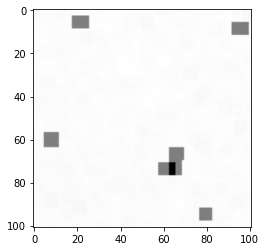

In [19]:
# look at cutout image
print(cutout_image.min())
plt.imshow(cutout_image, cmap='gray')

In [20]:
# I need gain from the coadd image in order to get the counts image
hdul = fits.open('/home/shawn/Downloads/2730_r.fits')
coadd_header = hdul[0].header
print(coadd_header)

SIMPLE  =                    T / This is a FITS file                            BITPIX  =                  -32                                                  NAXIS   =                    2                                                  NAXIS1  =                  101 / Number of pixels along this axis               NAXIS2  =                  101 / Number of pixels along this axis               OBJECT  = 'KIDS_214.0_1.5'                                                      ZEROPNT =                  0.0                                                  ZPNTERR =                  0.0                                                  CREADATE= '2015-10-19T21:27:53.000'                                             PSF_RAD =   0.5516852617263794                                                  INSTRUME= 'OMEGACAM'                                                            TELESCOP= 'ESO-VLT-U0'                                                          TEL_LAT =             -24.6259          

In [1]:
# now I want to see how it looks in counts.
gain = coadd_header['GAIN']
exp_time = 1800
rms_noise = 1/np.sqrt(cutout_image)
noise_eps = rms_noise*gain # I'm betting this is in e/s, which means the exp_time is contained in the gain, which makes sense.
#noise_eps = noise_counts/exp_time
#print(np.mean(noise_counts))
print(np.mean(noise_eps))

# plot image data
plt.figure()
#plt.title = (f'{hdul[0].header[6]}')
plt.imshow(noise_eps, cmap='gray') # show image in grayscale
plt.colorbar(label="pixel value", orientation="vertical")
plt.show()

NameError: name 'coadd_header' is not defined

In [31]:
# save as weight file
np.savetxt('/home/shawn/Desktop/autoz_lens_model/files/csv/2730_r_weight_image.csv', noise_eps, delimiter=",")

In [23]:
# try to open weight file with different name
hdul = fits.open('/home/shawn/Downloads/2730_r_weight_file.fits')
header = hdul[0].header
image = hdul[0].data
hdul.close()

print(image)
print('median pixel: ', np.median(image))
print(header)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
median pixel:  1.5508987e+23
SIMPLE  =                    T / This is a FITS file                            BITPIX  =                  -32 /                                                NAXIS   =                    2 /                                                NAXIS1  =                18687 / Number of pixels along this axis               NAXIS2  =                20024 / Number of pixels along this axis               EXTEND  =                    T / This file may contain FITS extensions          EQUINOX =            2000.0000 / Mean equinox                                   RADECSYS= 'ICRS    '           / Astrometric system                             CTYPE1  = 'RA---TAN'           / WCS projection type for this axis              CUNIT1  = 'deg     '           / Axis unit                                      CRVAL1  =      